## 抓取图片连结

In [1]:
import requests
res = requests.get('http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord+=&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=&word=%E6%9E%97%E5%BF%97%E7%8E%B2&z=&ic=&s=&se=&tab=&width=&height=&face=&istype=&qc=&nc=1&fr=&step_word=%E6%9E%97%E5%BF%97%E7%8E%B2&pn=30&rn=30&gsm=1e&1531834338861=')
res.encoding = 'utf-8'

In [2]:
for rec in res.json()['data']:
    print(rec.get('thumbURL'))

http://img5.imgtn.bdimg.com/it/u=2943953578,733865545&fm=26&gp=0.jpg
http://img5.imgtn.bdimg.com/it/u=190761644,632652117&fm=26&gp=0.jpg
http://img2.imgtn.bdimg.com/it/u=4162078340,3412190788&fm=11&gp=0.jpg
http://img0.imgtn.bdimg.com/it/u=1618306022,4281063404&fm=26&gp=0.jpg
http://img5.imgtn.bdimg.com/it/u=2389521092,3999962425&fm=26&gp=0.jpg
http://img1.imgtn.bdimg.com/it/u=158867322,2189934805&fm=26&gp=0.jpg
http://img3.imgtn.bdimg.com/it/u=3279795488,3092426129&fm=26&gp=0.jpg
http://img0.imgtn.bdimg.com/it/u=2947842148,873055832&fm=26&gp=0.jpg
http://img4.imgtn.bdimg.com/it/u=1512815466,2749302928&fm=26&gp=0.jpg
http://img4.imgtn.bdimg.com/it/u=2934876653,2587361733&fm=26&gp=0.jpg
http://img4.imgtn.bdimg.com/it/u=2296651686,3499327856&fm=26&gp=0.jpg
http://img5.imgtn.bdimg.com/it/u=2521206680,2972113243&fm=26&gp=0.jpg
http://img5.imgtn.bdimg.com/it/u=3533356984,4181475659&fm=26&gp=0.jpg
http://img4.imgtn.bdimg.com/it/u=2890525195,1643686963&fm=26&gp=0.jpg
http://img2.imgtn.bdimg.c

In [3]:
len(res.json()['data'])

31

## 储存爬取图片

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'}
with open('1.jpg', 'wb') as f:
    res2 = requests.get('http://img5.imgtn.bdimg.com/it/u=996248183,3063804300&fm=27&gp=0.jpg', headers = headers)
    #print(res2.text)
    f.write(res2.content)

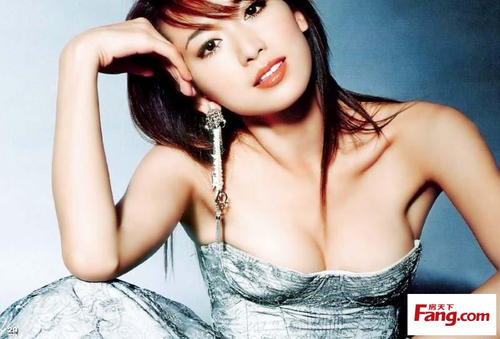

In [3]:
from PIL import Image
Image.open('1.jpg')

In [4]:
#http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord+=&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=&word=%E6%9E%97%E5%BF%97%E7%8E%B2&z=&ic=&s=&se=&tab=&width=&height=&face=&istype=&qc=&nc=1&fr=&step_word=%E6%9E%97%E5%BF%97%E7%8E%B2&pn=30&rn=30&gsm=1e&1531834338861=
#http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord+=&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=&word=%E6%9E%97%E5%BF%97%E7%8E%B2&z=&ic=&s=&se=&tab=&width=&height=&face=&istype=&qc=&nc=1&fr=&step_word=%E6%9E%97%E5%BF%97%E7%8E%B2&pn=60&rn=30&gsm=3c&1531834339067=

## 产生抓取连结

In [6]:
url = 'http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord+=&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=&word={0}&z=&ic=&s=&se=&tab=&width=&height=&face=&istype=&qc=&nc=1&fr=&step_word={0}&pn={1}&rn=30&gsm=1e&1531834338861='
from urllib import parse
k = parse.quote('范冰冰')
apiurl = url.format(k, 30)

In [7]:
res = requests.get(apiurl)
res.encoding = 'utf-8'
#res.json()

## 使用网络爬虫抓取明星图片

In [8]:
import requests, os
from urllib import parse
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'}
img_url = 'http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&is=&fp=result&word={0}&step_word={0}&pn={1}'

def getIdolPicture(keyword, dest_dir, batch):
    if not os.path.exists(dest_dir):
        os.mkdir(dest_dir)
    for i in range(batch):
        res = requests.get(img_url.format(parse.quote(keyword), i * 30))
        res.encoding = 'utf-8'
        print(len(res.json()['data']))
        for ele in res.json()['data']:
            url = ele.get('thumbURL')
            if url:
                with open(dest_dir + url.split('/')[-1], 'wb') as f:
                    res2 = requests.get(url, headers = headers)
                    f.write(res2.content)

In [9]:

getIdolPicture('范冰冰','test/', 1)

31


In [10]:
%ls 'test/'

u=1000246264,4197619623&fm=26&gp=0.jpg  u=3342732854,1625499286&fm=26&gp=0.jpg
u=1204697121,4176423980&fm=26&gp=0.jpg  u=3354558432,3466939386&fm=26&gp=0.jpg
u=1260972629,1597727638&fm=26&gp=0.jpg  u=3403057468,3578845169&fm=26&gp=0.jpg
u=1275673866,2467741413&fm=26&gp=0.jpg  u=3572064558,3743513577&fm=26&gp=0.jpg
u=1289692098,4255696767&fm=26&gp=0.jpg  u=360822494,4081314413&fm=11&gp=0.jpg
u=1315916518,1392801195&fm=26&gp=0.jpg  u=3626258961,1071478629&fm=11&gp=0.jpg
u=1613688635,1367243683&fm=26&gp=0.jpg  u=3653367522,1747176634&fm=26&gp=0.jpg
u=1928097257,3770512674&fm=26&gp=0.jpg  u=3677495618,3249345474&fm=26&gp=0.jpg
u=2269716688,3280834220&fm=26&gp=0.jpg  u=3705399668,3571375588&fm=26&gp=0.jpg
u=2324246157,2482990037&fm=26&gp=0.jpg  u=3719817657,2275729302&fm=26&gp=0.jpg
u=2552475149,3299941288&fm=26&gp=0.jpg  u=3768187293,2237805065&fm=11&gp=0.jpg
u=2650314603,2487422644&fm=26&gp=0.jpg  u=3778305610,3113133313&fm=26&gp=0.jpg
u=3062483585,3201782085&fm=26&gp=0.jpg  u=3800046815,

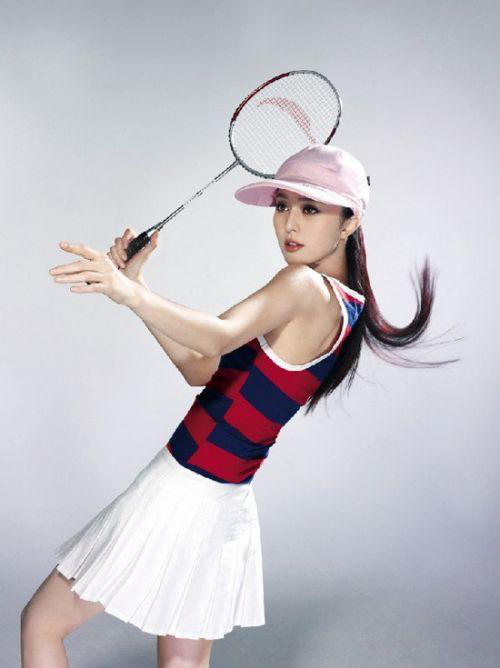

In [12]:
from PIL import Image
Image.open('test/u=1000246264,4197619623&fm=26&gp=0.jpg')